In [15]:
!pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.7 MB/s eta 0:00:00


In [29]:
import pandas as pd

# Load the dataset
file_path = 'german_credit_data.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()

# Print unique values of all columns
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Unnamed: 0': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

Using 'Risk' as the target variable. Unique values: ['good' 'bad']

--- Logistic Regression ---
Accuracy: 0.6800
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       141
           1       0.47      0.63      0.54        59

    accuracy                           0.68       200
   macro avg       0.64      0.66      0.65       200
weighted avg       0.71      0.68      0.69       200

AUC-ROC: 0.7459


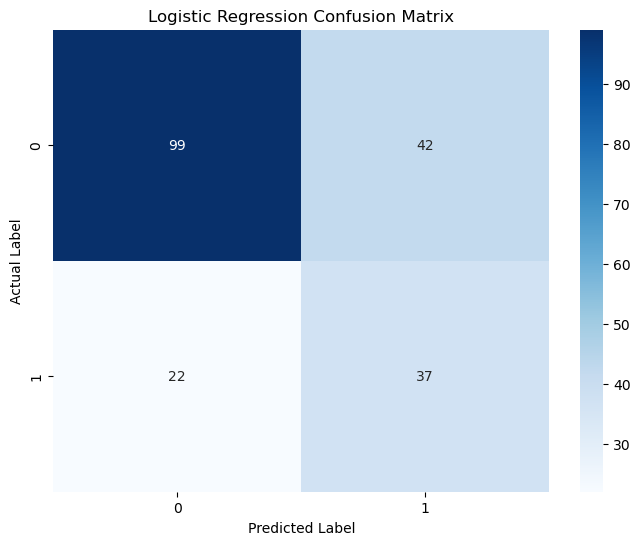

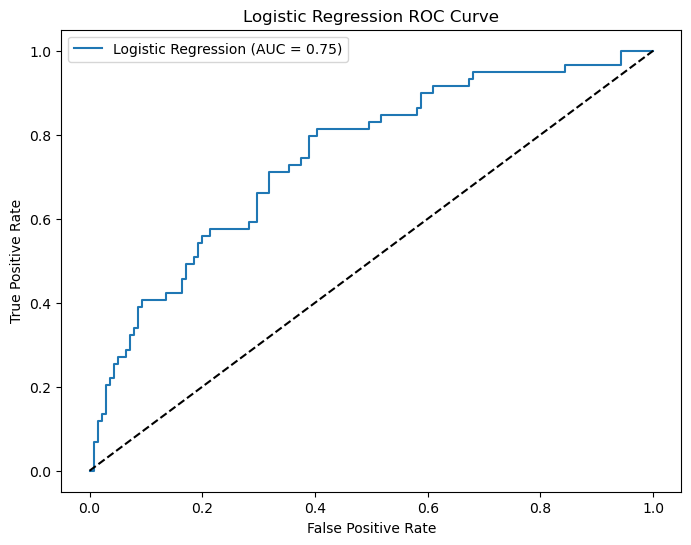


--- LightGBM ---
[LightGBM] [Info] Number of positive: 241, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

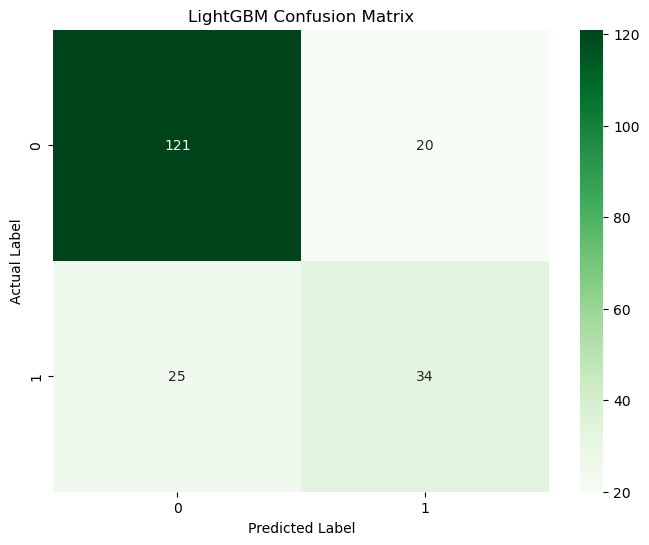

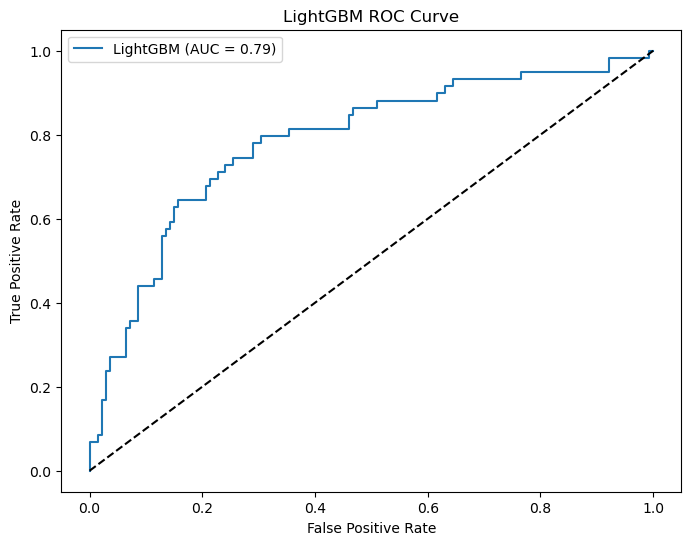

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb

# Load the dataset
# Load the dataset
file_path = 'german_credit_data.csv'  # Updated filename
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the path.")
    exit()

# Assuming the target variable is 'Risk'
target_column = 'Risk'
print(f"Using '{target_column}' as the target variable. Unique values: {df[target_column].unique()}")

# Convert 'Risk' column to numerical values: 'bad' = 1, 'good' = 0
df['Risk'] = df['Risk'].map({'good': 0, 'bad': 1})
y = df['Risk']
X = df.drop(target_column, axis=1)

# ... rest of your preprocessing and modeling code ...
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns.drop('Unnamed: 0', errors='ignore')

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- Logistic Regression ---
print("\n--- Logistic Regression ---")
logistic_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced') # 'balanced' handles potential class imbalance
logistic_model.fit(X_train_processed, y_train)
y_pred_logistic = logistic_model.predict(X_test_processed)
y_prob_logistic = logistic_model.predict_proba(X_test_processed)[:, 1]

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy_logistic:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_logistic):.4f}")

cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_logistic):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# --- LightGBM ---
print("\n--- LightGBM ---")
lgbm_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced') # 'balanced' handles potential class imbalance
lgbm_model.fit(X_train_processed, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_processed)
y_prob_lgbm = lgbm_model.predict_proba(X_test_processed)[:, 1]

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy_lgbm:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_lgbm):.4f}")

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LightGBM Confusion Matrix')
plt.show()

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_prob_lgbm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend()
plt.show()